## Polynomial Regression
#### feature 가 여러개인 multiple regression 과 다르게 x는 하나인 대신에 해당 x의 제곱 차승이 더해진 모델
- 선형인지 비선형인지? : 어떤것을 기준으로 두었느냐에 따라서 답이 달라질 수 있음. x(feature)를 기준으로 보면, 비선형 / 기울기가 기준이 되면 선형

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv("C:/Users/Ina Lee/PythonStudy/2019_study/Machine_Learning_AZ_Template_Folder/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Polynomial_Regression/Polynomial_Regression/Position_Salaries.csv")

In [7]:
dataset

# position - categorical value / level을 x faeture 로 사용 , salary : y , position 은 order 를 지니고 있기 때문에 .. level로 사용할 수 있음

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


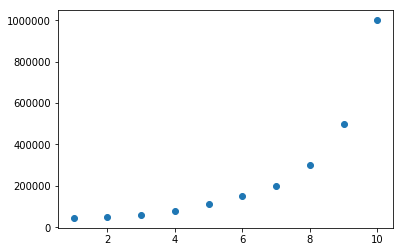

In [8]:
plt.scatter(dataset.Level,dataset.Salary)

In [9]:
X = dataset.iloc[:,1].values
y = dataset.iloc[:,2].values

In [12]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [14]:
# X matrix 만들기

X = dataset.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

#### train_test 로 데이터셋 나누지 않음 , 10개의 observation 밖에 없으므로..
- linear regression 모델을 우리 데이터셋에 fit

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# feature scaling 필요할까? - feature 가 한개라 필요없을 듯   일단 linear regression 에서는 필요없음(모델안에 알아서 얘네가 해줌)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [26]:
X_poly  # X 제곱한 값들을 매트릭스로 만들어줌

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [29]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

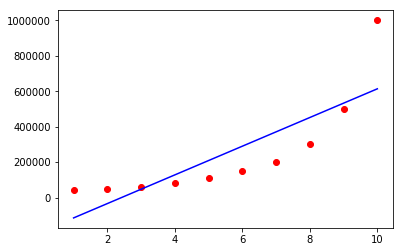

In [33]:
# SImple Linear Regression Model

plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color="blue")

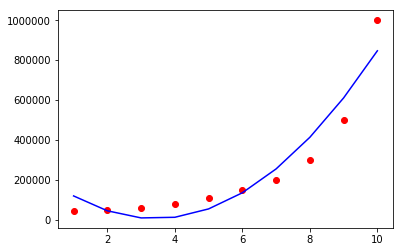

In [37]:
# Polynomial Regression Model

plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')

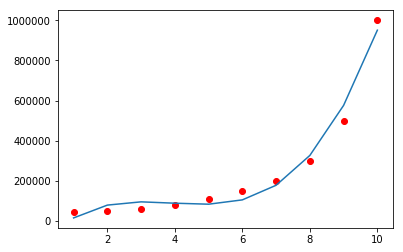

In [43]:
# 선을 더 매끄럽게 하기 위해서 ,degress 를 증가시키자

poly_reg_2 = PolynomialFeatures(degree=3)
X_poly = poly_reg_2.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg_2.fit_transform(X)))

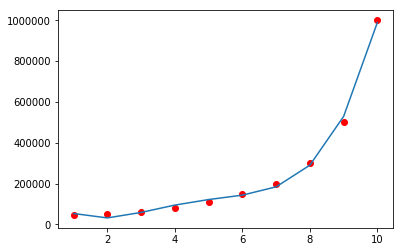

In [57]:
# 선을 더 매끄럽게 하기 위해서 ,degress 를 증가시키자  - 4차

poly_reg_2 = PolynomialFeatures(degree=4)
X_poly = poly_reg_2.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg_2.fit_transform(X)))

In [54]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((-1,1))
X_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

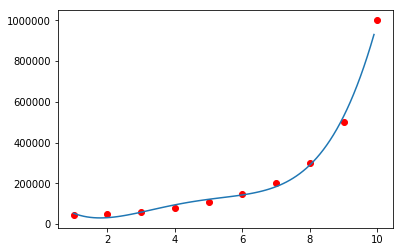

In [58]:
plt.scatter(X,y,color="red")
plt.plot(X_grid,lin_reg_2.predict(poly_reg_2.fit_transform(X_grid)))

### 새로운 X에 대한 y 예측(simple  / polynomial)

In [63]:
lin_reg.predict([[6.5]])  # matrix 형탤 바꿔주어야 함 ( simple linear regression )

array([330378.78787879])

In [65]:
lin_reg_2.predict(poly_reg_2.fit_transform([[6.5]]))

array([158862.45265155])

### SVR
#### support vector regression
##### linear regression: 에러 최소화 / SVR : boundary 안에 있는 error 에 대해서만 fit 하는게 objective 

SVR VS SVM - 차이점?
    
SVM - hyperplane 은 class 를 나누느 기준 선  , SVR 에서는 타겟 value 에 대한 예측을 도와줄 라인


boundary - hyperplane을 기준으로 e만큼의 거리로 +,- 방향으로 떨어져있는 두선(margin) , support vector 들은 이 바운더리에 걸치거나 바깥에 위치


Support Vector - boundary 와 가장 가까운 포인트들

In [67]:
dataset2 = pd.read_csv("C:/Users/Ina Lee/PythonStudy/2019_study/Machine_Learning_AZ_Template_Folder/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/SVR/Position_Salaries.csv")

In [120]:
dataset2

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [121]:
X = dataset2.iloc[:,1:2].values
y = dataset2.iloc[:,2].values

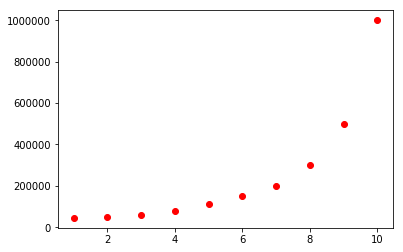

In [122]:
plt.scatter(X,y,color='red')

In [123]:
from sklearn.svm import SVR
regressor = SVR() ## deafult kernel :  RBF
regressor.fit(X,y)

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [124]:
y_pred = regressor.predict([[6.5]])

In [125]:
y_pred

array([130001.55760156])

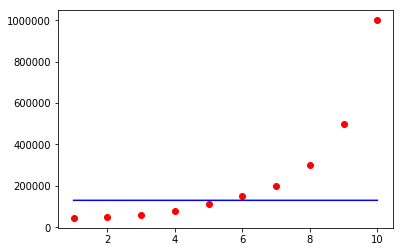

In [126]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.show()


## feature scaling이 알아서 안되있으므로 ...

In [127]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(np.expand_dims(y,axis=1)) #1차원 어레이를 2차원으로 늘려주는 거

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [128]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [129]:
y = np.squeeze(y,axis=1) # y를 다시 1차원으로 차원 축소

In [130]:
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [131]:
regressor_2 = SVR()
regressor_2.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [132]:
regressor_2.predict([[6.5]])

array([0.01158103])

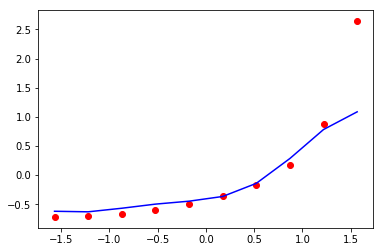

In [133]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor_2.predict(X),color='blue')
plt.show()

In [109]:
# 마지막 값에 대해서는 outlier로 계산하여 그 외의 포인트들에 대해 fit 하게 만듦(out of boundary)

In [134]:
# 실제 값으로 되돌리기!

sc_y.inverse_transform(regressor_2.predict(sc_X.transform([[6.5]])))

array([170370.0204065])